<a href="https://colab.research.google.com/github/reza-pishva/RNN-projects/blob/main/clustering_lube_oil_g11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, silhouette_samples
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda, Layer
from tensorflow.keras.losses import mse
from sklearn.decomposition import PCA
from tensorflow.keras import backend as K
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as sch
import warnings # Ignore specific warnings
warnings.filterwarnings("ignore")

In [21]:
df1 = pd.read_excel('output_lube_oil_g11.xlsx')

In [22]:
df1.head(10)

,AssetID_8341,AssetID_8342,AssetID_8343,AssetID_8344,AssetID_8346,AssetID_9286,AssetID_9287,date
0,0.23,12.30,66.0,-205.0,7.9,NaN,NaN,2021-03-17 09:16:14
1,0.21,12.30,63.0,-205.0,7.9,8.0,1.45,2021-03-18 08:44:03
2,0.21,12.30,62.0,-205.0,0.0,8.1,1.38,2021-03-19 09:01:53
3,0.25,12.30,61.0,-200.0,7.8,8.0,1.38,2021-03-20 17:49:02
4,0.23,12.30,58.0,-205.0,7.8,8.1,1.38,2021-03-20 20:05:58
5,0.21,12.30,62.0,-205.0,7.8,8.1,1.38,2021-03-20 22:43:37
6,0.21,12.30,62.0,-205.0,7.8,8.1,1.38,2021-03-21 02:05:28
7,0.23,0.23,64.0,-240.0,8.0,NaN,NaN,2021-03-21 05:17:54
8,NaN,NaN,62.0,-210.0,8.0,NaN,NaN,2021-03-21 08:10:07
9,0.23,NaN,65.0,-210.0,7.8,NaN,NaN,2021-03-21 10:45:51


In [23]:
df1.columns

Index(['AssetID_8341', 'AssetID_8342', 'AssetID_8343', 'AssetID_8344',
       'AssetID_8346', 'AssetID_9286', 'AssetID_9287', 'date'],
      dtype='object')

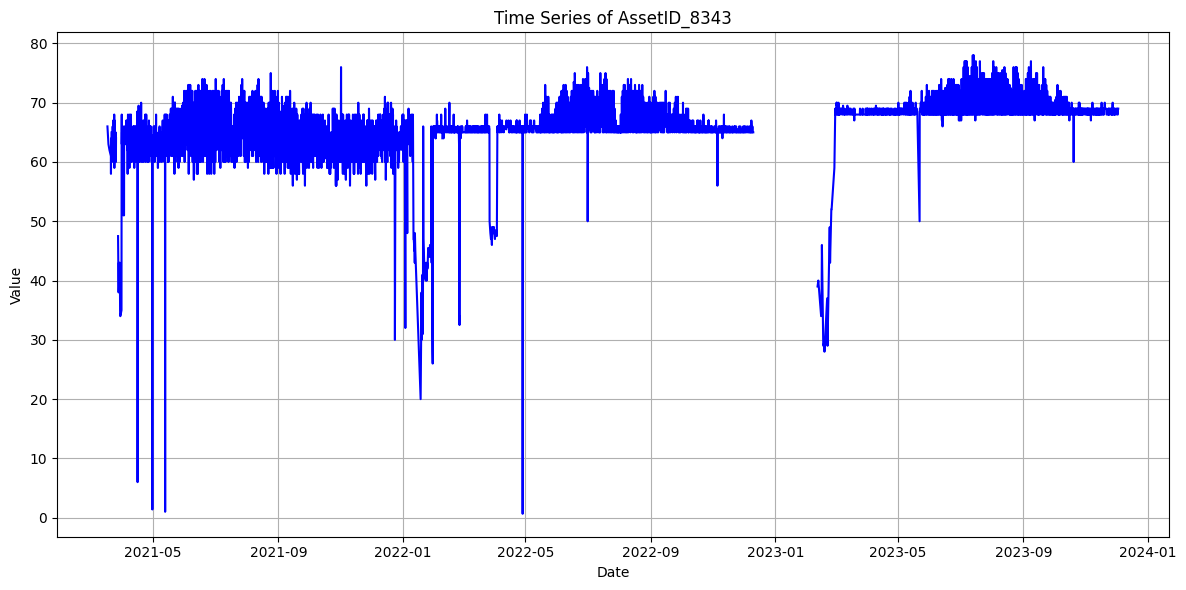

In [24]:
# تبدیل ستون تاریخ به datetime
df1['date'] = pd.to_datetime(df1['date'], errors='coerce')

# رسم نمودار برای AssetID_8343
plt.figure(figsize=(12, 6))
plt.plot(df1['date'], df1['AssetID_8343'], color='blue')
plt.title('Time Series of AssetID_8343')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

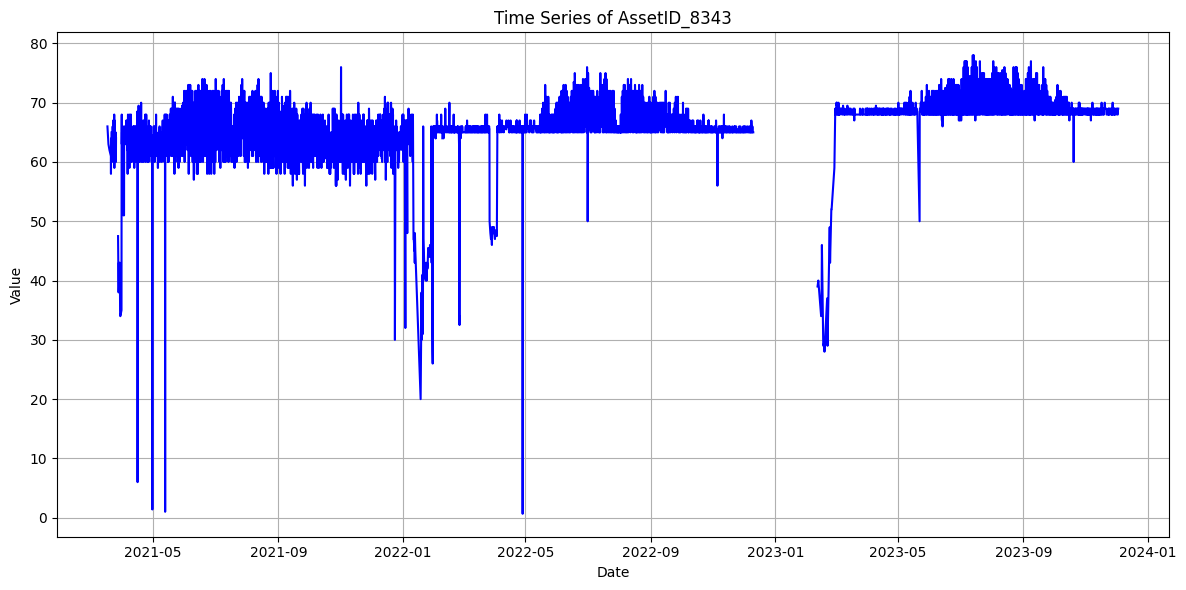

In [25]:
# تبدیل ستون تاریخ به datetime
df1['date'] = pd.to_datetime(df1['date'], errors='coerce')

# رسم نمودار برای AssetID_8312
plt.figure(figsize=(12, 6))
plt.plot(df1['date'], df1['AssetID_8343'], color='blue')
plt.title('Time Series of AssetID_8343')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

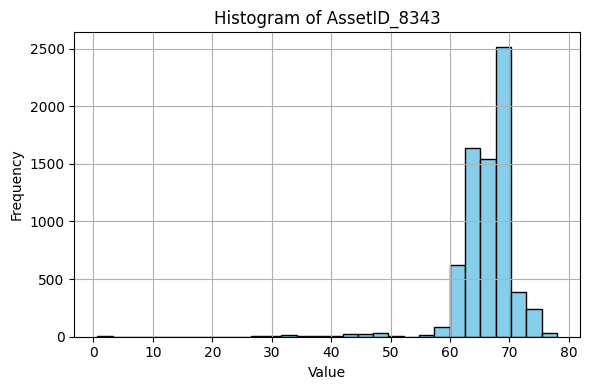

In [26]:
# رسم هیستوگرام برای AssetID_8343
plt.figure(figsize=(6, 4))
plt.hist(df1['AssetID_8343'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of AssetID_8343')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


In [27]:
from sklearn.preprocessing import StandardScaler

# انتخاب ستون‌ها برای استانداردسازی
data_to_scale = df1[['AssetID_8341', 'AssetID_8342', 'AssetID_8343', 'AssetID_8344',
       'AssetID_8346', 'AssetID_9286', 'AssetID_9287']]

# استانداردسازی داده‌ها
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# تبدیل خروجی به دیتافریم با همان نام ستون‌ها
scaled_df = pd.DataFrame(scaled_data, columns=['AssetID_8341', 'AssetID_8342', 'AssetID_8343', 'AssetID_8344',
       'AssetID_8346', 'AssetID_9286', 'AssetID_9287'])

# نمایش ۵ ردیف اول
print(scaled_df.head())


   AssetID_8341  AssetID_8342  AssetID_8343  AssetID_8344  AssetID_8346  \
0      0.484130      0.469185     -0.038876      1.153648      0.398220   
1      0.277089      0.469185     -0.652971      1.153648      0.398220   
2      0.277089      0.469185     -0.857669      1.153648     -5.338017   
3      0.691171      0.469185     -1.062368      1.409066      0.325609   
4      0.484130      0.469185     -1.676463      1.153648      0.325609   

   AssetID_9286  AssetID_9287  
0           NaN           NaN  
1      0.127800      0.023640  
2      0.168002     -0.004419  
3      0.127800     -0.004419  
4      0.168002     -0.004419  


In [28]:
scaled_df_clean = scaled_df.dropna()

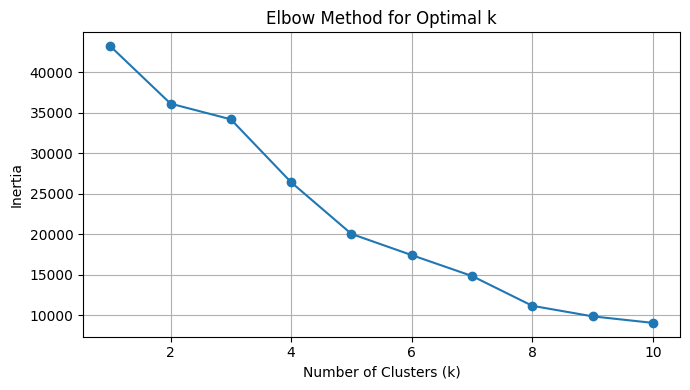

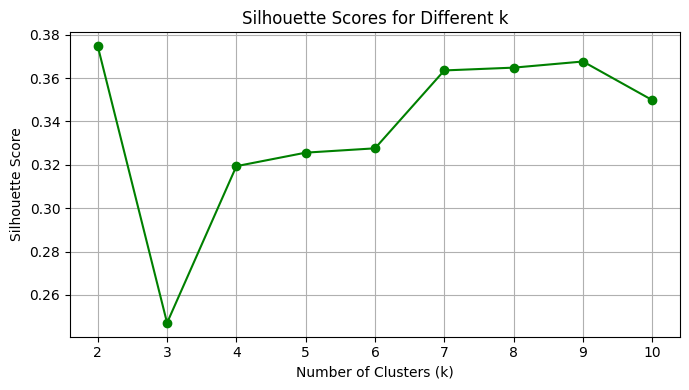

In [29]:
X = scaled_df_clean[['AssetID_8341', 'AssetID_8342', 'AssetID_8343', 'AssetID_8344',
       'AssetID_8346', 'AssetID_9286', 'AssetID_9287']]

# Elbow Method
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

# Silhouette Scores
silhouette_scores = []
k_range_sil = range(2, 11)
for k in k_range_sil:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(7, 4))
plt.plot(k_range_sil, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()


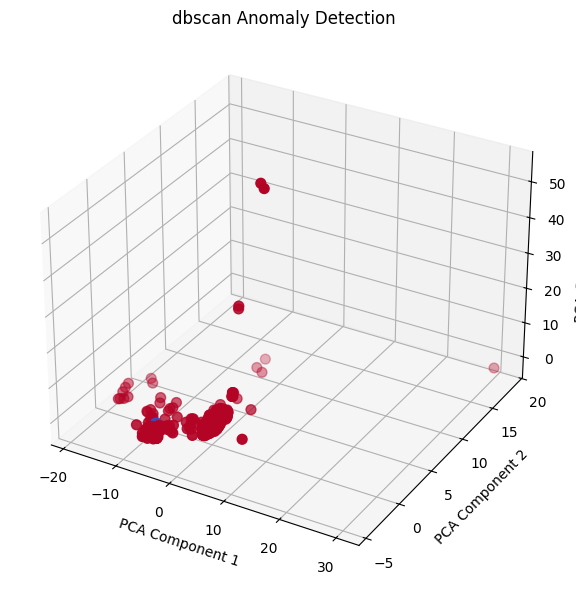

In [30]:
# اجرای DBSCAN روی داده‌های استانداردشده
dbscan = DBSCAN(eps=0.7, min_samples=6)
labels = dbscan.fit_predict(scaled_df_clean)

# کاهش ابعاد داده‌ها به سه مؤلفه اصلی با PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_df_clean)

# رسم داده‌ها با رنگ‌بندی بر اساس برچسب‌های LOF در فضای سه‌بعدی
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    pca_result[:, 2],
    c=[0 if label == 1 else 1 for label in labels],  # 0 = normal, 1 = abnormal
    cmap='coolwarm',
    s=50
)

ax.set_title('dbscan Anomaly Detection')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.tight_layout()
plt.show()


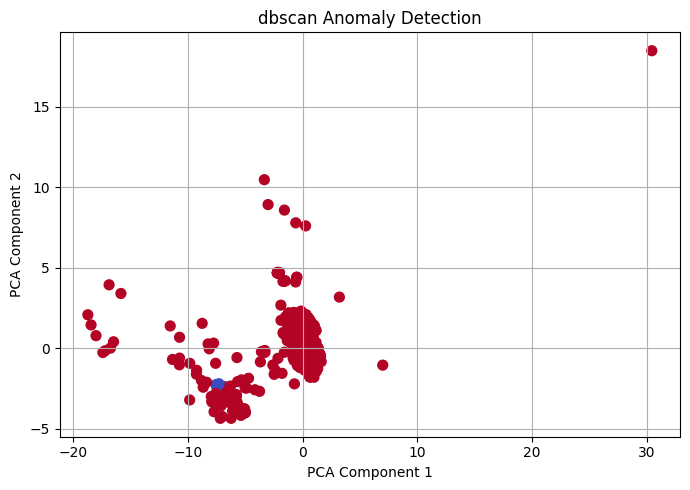

In [31]:
# اجرای DBSCAN روی داده‌های استانداردشده
dbscan = DBSCAN(eps=0.7, min_samples=6)
labels = dbscan.fit_predict(scaled_df_clean)

# کاهش ابعاد داده‌ها به دو مؤلفه اصلی با PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df_clean)

# رسم داده‌ها با رنگ‌بندی بر اساس برچسب‌های LOF
plt.figure(figsize=(7, 5))
plt.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    c=[0 if label == 1 else 1 for label in labels],  # 0 = normal, 1 = abnormal
    cmap='coolwarm',
    s=50
)
plt.title('dbscan Anomaly Detection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
import numpy as np

num_abnormal = np.sum(labels == -1)
num_total = len(labels)
print(f"درصد ناهنجاری‌ها: {100 * num_abnormal / num_total:.2f}%")


درصد ناهنجاری‌ها: 1.29%


In [33]:
import pandas as pd

# ساخت یک سری از برچسب‌های خوشه
cluster_series = pd.Series(labels)

# شمارش تعداد اعضای هر خوشه
cluster_counts = cluster_series.value_counts().sort_index()

# نمایش نتایج
print("تعداد داده‌ها در هر خوشه:")
for cluster_id, count in cluster_counts.items():
    label = f"Cluster {cluster_id}" if cluster_id != -1 else "Noise (abnormal)"
    print(f"{label}: {count} مورد")


تعداد داده‌ها در هر خوشه:
Noise (abnormal): 93 مورد
Cluster 0: 7017 مورد
Cluster 1: 6 مورد
Cluster 2: 10 مورد
Cluster 3: 33 مورد
Cluster 4: 17 مورد
Cluster 5: 17 مورد
Cluster 6: 7 مورد
Cluster 7: 7 مورد


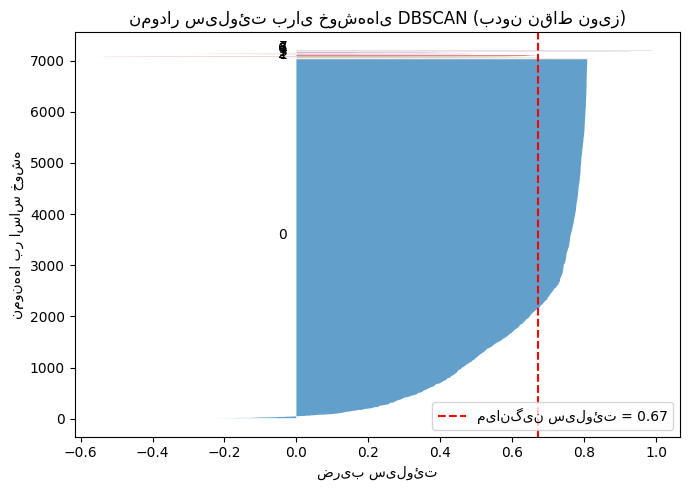

In [34]:
# اجرای DBSCAN روی داده‌های استانداردشده
dbscan = DBSCAN(eps=0.7, min_samples=6)
labels = dbscan.fit_predict(scaled_df_clean)

# کاهش ابعاد با PCA برای نمایش و تحلیل
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df_clean)

# فیلتر کردن داده‌های نرمال (برچسب ≠ -1)
mask = labels != -1
pca_filtered = pca_result[mask]
labels_filtered = labels[mask]

# محاسبه نمرات سیلوئت
silhouette_vals = silhouette_samples(pca_filtered, labels_filtered)
silhouette_avg = silhouette_score(pca_filtered, labels_filtered)

# رسم نمودار سیلوئت
plt.figure(figsize=(7, 5))
y_lower = 10
for i in np.unique(labels_filtered):
    ith_cluster_silhouette_vals = silhouette_vals[labels_filtered == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_vals,
        alpha=0.7
    )
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--", label=f"میانگین سیلوئت = {silhouette_avg:.2f}")
plt.xlabel("ضریب سیلوئت")
plt.ylabel("نمونه‌ها بر اساس خوشه")
plt.title("نمودار سیلوئت برای خوشه‌های DBSCAN (بدون نقاط نویز)")
plt.legend()
plt.tight_layout()
plt.show()


In [35]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

best_score = -1
best_params = None

for eps in [0.3, 0.5, 0.7, 0.9]:
    for min_samples in [3, 4, 5, 6]:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(scaled_df_clean)

        # فقط نقاط نرمال را برای سیلوئت در نظر بگیر
        mask = labels != -1
        if len(set(labels[mask])) > 1:
            score = silhouette_score(scaled_df_clean[mask], labels[mask])
            print(f"eps={eps}, min_samples={min_samples} → silhouette={score:.3f}")
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)

print(f"\n✅ بهترین ترکیب: eps={best_params[0]}, min_samples={best_params[1]} با نمره سیلوئت {best_score:.3f}")


eps=0.3, min_samples=3 → silhouette=-0.191
eps=0.3, min_samples=4 → silhouette=-0.152
eps=0.3, min_samples=5 → silhouette=-0.108
eps=0.3, min_samples=6 → silhouette=-0.106
eps=0.5, min_samples=3 → silhouette=-0.241
eps=0.5, min_samples=4 → silhouette=-0.234
eps=0.5, min_samples=5 → silhouette=-0.125
eps=0.5, min_samples=6 → silhouette=-0.129
eps=0.7, min_samples=3 → silhouette=0.143
eps=0.7, min_samples=4 → silhouette=0.704
eps=0.7, min_samples=5 → silhouette=0.704
eps=0.7, min_samples=6 → silhouette=0.704
eps=0.9, min_samples=3 → silhouette=0.143
eps=0.9, min_samples=4 → silhouette=0.703
eps=0.9, min_samples=5 → silhouette=0.703
eps=0.9, min_samples=6 → silhouette=0.704

✅ بهترین ترکیب: eps=0.7, min_samples=6 با نمره سیلوئت 0.704


In [36]:
# اجرای DBSCAN روی داده‌های استانداردشده
dbscan = DBSCAN(eps=0.7, min_samples=6) # Using the best params found earlier
labels = dbscan.fit_predict(scaled_df_clean)

# اضافه کردن برچسب خوشه به دیتافریم استانداردشده
scaled_df_clean['dbscan_label'] = labels

# افزودن برچسب DBSCAN به دیتافریم اصلی با استفاده از ایندکس
df1 = df1.merge(scaled_df_clean[['dbscan_label']], left_index=True, right_index=True, how='left')

# فیلتر کردن نمونه‌های غیرنرمال (برچسب -1)
abnormal_df = df1[df1['dbscan_label'] == -1]

# انتخاب ۱۰ نمونه تصادفی از موارد غیرنرمال
abnormal_sample = abnormal_df.sample(n=10, random_state=42).reset_index(drop=True)

# نمایش جدول نهایی
print("🔍 ۱۰ نمونه از داده‌های غیرنرمال شناسایی‌شده توسط DBSCAN (با مقادیر واقعی):")
print(abnormal_sample)

🔍 ۱۰ نمونه از داده‌های غیرنرمال شناسایی‌شده توسط DBSCAN (با مقادیر واقعی):
   AssetID_8341  AssetID_8342  AssetID_8343  AssetID_8344  AssetID_8346  \
0          0.14          11.0          65.0        -250.0           7.6   
1          0.25          12.2          64.0        -200.0           7.8   
2          0.10          11.4          34.0        -260.0           0.0   
3          0.55           0.0          30.0        -180.0           0.0   
4          0.21          12.3          62.0        -205.0           0.0   
5          0.25          12.0          64.0        -200.0           7.8   
6          0.27          12.0          48.0        -250.0           7.7   
7          0.50           0.0          34.0        -200.0           0.0   
8          0.20          11.9          51.0        -240.0           0.0   
9          0.28          11.6          33.0        -260.0           0.0   

   AssetID_9286  AssetID_9287                date  dbscan_label  
0           8.0          1.34 202

In [37]:
from sklearn.cluster import DBSCAN
import pandas as pd

# اجرای DBSCAN روی داده‌های استانداردشده
dbscan = DBSCAN(eps=0.7, min_samples=6)
labels = dbscan.fit_predict(scaled_df_clean)

# افزودن برچسب خوشه به دیتافریم استانداردشده
scaled_df_clean['dbscan_label'] = labels

# افزودن برچسب DBSCAN به دیتافریم اصلی با استفاده از ایندکس
df1 = df1.merge(scaled_df_clean[['dbscan_label']], left_index=True, right_index=True, how='left', suffixes=('', '_y'))

# حذف ستون‌های تکراری در صورت وجود
df1 = df1.loc[:, ~df1.columns.duplicated()]

# فیلتر کردن نمونه‌های غیرنرمال (برچسب -1)
abnormal_df = df1[df1['dbscan_label'] == -1]

# انتخاب ۱۰ نمونه تصادفی از موارد غیرنرمال
abnormal_sample = abnormal_df.sample(n=10, random_state=42).reset_index(drop=True)

# حذف ستون برچسب DBSCAN
abnormal_sample = abnormal_sample.drop(columns=['dbscan_label'])

# نمایش جدول نهایی به‌صورت یکپارچه
pd.set_option('display.max_columns', None)  # نمایش تمام ستون‌ها
pd.set_option('display.width', None)        # جلوگیری از شکستن خطوط
print("🔍 ۱۰ نمونه از داده‌های غیرنرمال شناسایی‌شده توسط DBSCAN (با مقادیر واقعی):")
print(abnormal_sample)


🔍 ۱۰ نمونه از داده‌های غیرنرمال شناسایی‌شده توسط DBSCAN (با مقادیر واقعی):
   AssetID_8341  AssetID_8342  AssetID_8343  AssetID_8344  AssetID_8346  \
0          0.14          11.0          65.0        -250.0           7.6   
1          0.25          12.2          64.0        -200.0           7.8   
2          0.10          11.4          34.0        -260.0           0.0   
3          0.55           0.0          30.0        -180.0           0.0   
4          0.21          12.3          62.0        -205.0           0.0   
5          0.25          12.0          64.0        -200.0           7.8   
6          0.27          12.0          48.0        -250.0           7.7   
7          0.50           0.0          34.0        -200.0           0.0   
8          0.20          11.9          51.0        -240.0           0.0   
9          0.28          11.6          33.0        -260.0           0.0   

   AssetID_9286  AssetID_9287                date  dbscan_label_y  
0           8.0          1.34 2

In [38]:
# تبدیل جدول به HTML
html_output = abnormal_sample.to_html(index=False, border=1, justify='center')

# نمایش HTML در خروجی
print("🔍 خروجی HTML جدول نمونه‌های غیرنرمال:")
print(html_output)


🔍 خروجی HTML جدول نمونه‌های غیرنرمال:
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: center;">
      <th>AssetID_8341</th>
      <th>AssetID_8342</th>
      <th>AssetID_8343</th>
      <th>AssetID_8344</th>
      <th>AssetID_8346</th>
      <th>AssetID_9286</th>
      <th>AssetID_9287</th>
      <th>date</th>
      <th>dbscan_label_y</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0.14</td>
      <td>11.0</td>
      <td>65.0</td>
      <td>-250.0</td>
      <td>7.6</td>
      <td>8.0</td>
      <td>1.34</td>
      <td>2022-01-07 16:47:32</td>
      <td>-1.0</td>
    </tr>
    <tr>
      <td>0.25</td>
      <td>12.2</td>
      <td>64.0</td>
      <td>-200.0</td>
      <td>7.8</td>
      <td>8.0</td>
      <td>66.00</td>
      <td>2021-06-18 01:22:27</td>
      <td>-1.0</td>
    </tr>
    <tr>
      <td>0.10</td>
      <td>11.4</td>
      <td>34.0</td>
      <td>-260.0</td>
      <td>0.0</td>
      <td>7.9</td>
      <td>1.64</td>
      <td>2022-02-25 04

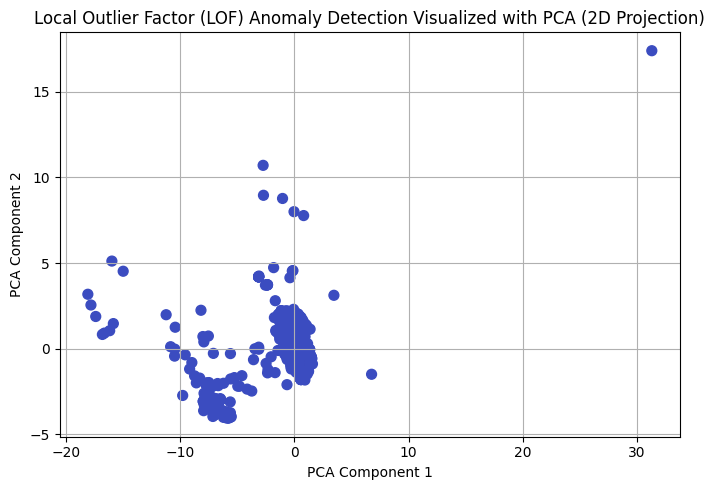

In [39]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# اجرای LOF روی داده‌های استانداردشده
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.01)
labels = lof.fit_predict(scaled_df_clean)

# کاهش ابعاد داده‌ها به دو مؤلفه اصلی با PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df_clean)

# رسم داده‌ها با رنگ‌بندی بر اساس برچسب‌های LOF
plt.figure(figsize=(7, 5))
plt.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    c=[0 if label == 1 else 1 for label in labels],  # 0 = normal, 1 = abnormal
    cmap='coolwarm',
    s=50
)
plt.title('Local Outlier Factor (LOF) Anomaly Detection Visualized with PCA (2D Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()


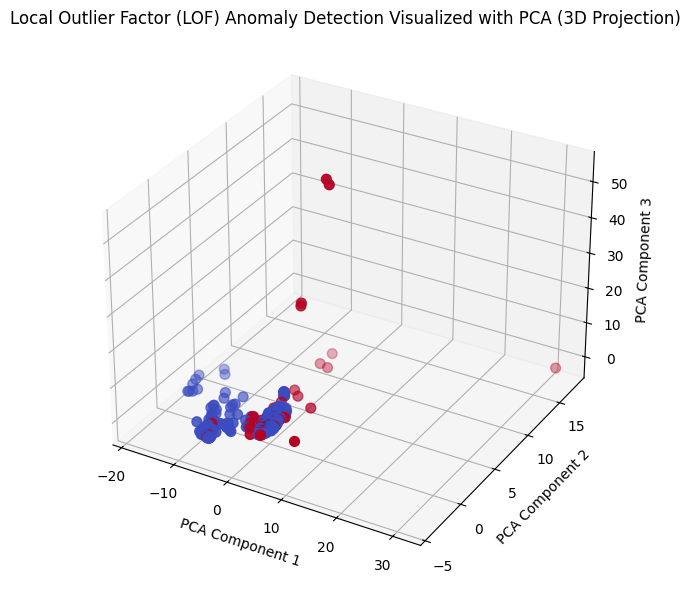

In [42]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# اجرای LOF روی داده‌های استانداردشده
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.1)
labels = lof.fit_predict(scaled_df_clean)

# کاهش ابعاد داده‌ها به سه مؤلفه اصلی با PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_df_clean)

# رسم داده‌ها با رنگ‌بندی بر اساس برچسب‌های LOF در فضای سه‌بعدی
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    pca_result[:, 2],
    c=[0 if label == 1 else 1 for label in labels],  # 0 = normal, 1 = abnormal
    cmap='coolwarm',
    s=50
)

ax.set_title('Local Outlier Factor (LOF) Anomaly Detection Visualized with PCA (3D Projection)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.tight_layout()
plt.show()


In [41]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np

best_ratio = -1
best_params = None

for contamination in [0.01, 0.03, 0.05, 0.1]:
    for n_neighbors in [10, 15, 20, 25]:
        lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
        labels = lof.fit_predict(scaled_df_clean)

        # محاسبه درصد ناهنجاری‌ها
        num_abnormal = np.sum(labels == -1)
        ratio = num_abnormal / len(labels)

        print(f"n_neighbors={n_neighbors}, contamination={contamination} → abnormal ratio={ratio:.3f}")

        # انتخاب ترکیبی که بیشترین ناهنجاری منطقی را شناسایی کند
        if ratio > best_ratio and ratio < 0.2:  # محدود کردن به درصدهای منطقی
            best_ratio = ratio
            best_params = (n_neighbors, contamination)

print(f"\n✅ بهترین ترکیب: n_neighbors={best_params[0]}, contamination={best_params[1]} با نسبت ناهنجاری {best_ratio:.3f}")


n_neighbors=10, contamination=0.01 → abnormal ratio=0.010
n_neighbors=15, contamination=0.01 → abnormal ratio=0.009
n_neighbors=20, contamination=0.01 → abnormal ratio=0.010
n_neighbors=25, contamination=0.01 → abnormal ratio=0.010
n_neighbors=10, contamination=0.03 → abnormal ratio=0.030
n_neighbors=15, contamination=0.03 → abnormal ratio=0.030
n_neighbors=20, contamination=0.03 → abnormal ratio=0.030
n_neighbors=25, contamination=0.03 → abnormal ratio=0.030
n_neighbors=10, contamination=0.05 → abnormal ratio=0.050
n_neighbors=15, contamination=0.05 → abnormal ratio=0.050
n_neighbors=20, contamination=0.05 → abnormal ratio=0.050
n_neighbors=25, contamination=0.05 → abnormal ratio=0.050
n_neighbors=10, contamination=0.1 → abnormal ratio=0.100
n_neighbors=15, contamination=0.1 → abnormal ratio=0.100
n_neighbors=20, contamination=0.1 → abnormal ratio=0.100
n_neighbors=25, contamination=0.1 → abnormal ratio=0.100

✅ بهترین ترکیب: n_neighbors=10, contamination=0.1 با نسبت ناهنجاری 0.100


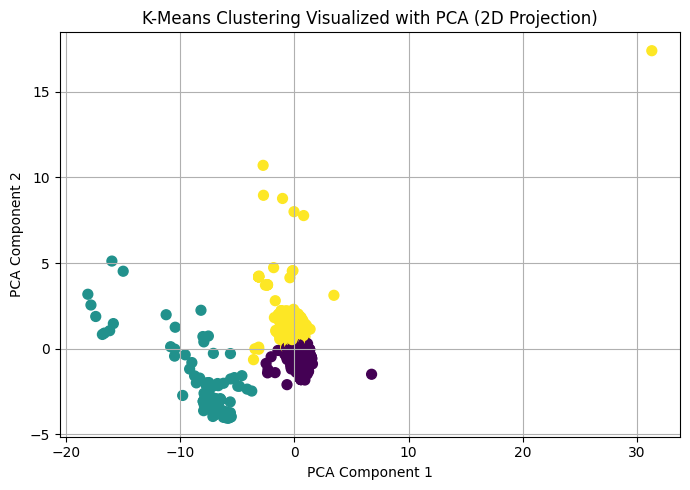

In [43]:
# اجرای K-Means روی داده‌های استانداردشده
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(scaled_df_clean)

# کاهش ابعاد داده‌ها به دو مؤلفه اصلی با PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df_clean)

# رسم داده‌ها با رنگ‌بندی بر اساس برچسب‌های K-Means
plt.figure(figsize=(7, 5))
plt.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    c=labels,
    cmap='viridis',
    s=50
)
plt.title('K-Means Clustering Visualized with PCA (2D Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()


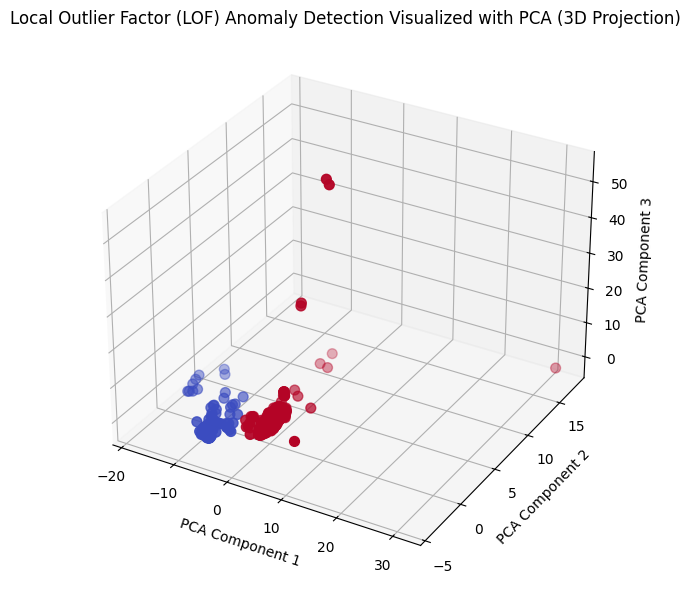

In [44]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# اجرای خوشه‌بندی تجمعی روی داده‌های استانداردشده
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')  # تعداد خوشه‌ها قابل تنظیم است
cluster_labels = agglo.fit_predict(scaled_df_clean)

# کاهش ابعاد داده‌ها به سه مؤلفه اصلی با PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_df_clean)

# رسم داده‌ها با رنگ‌بندی بر اساس برچسب‌های LOF در فضای سه‌بعدی
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    pca_result[:, 2],
    c=[0 if label == 1 else 1 for label in labels],  # 0 = normal, 1 = abnormal
    cmap='coolwarm',
    s=50
)

ax.set_title('Local Outlier Factor (LOF) Anomaly Detection Visualized with PCA (3D Projection)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.tight_layout()
plt.show()



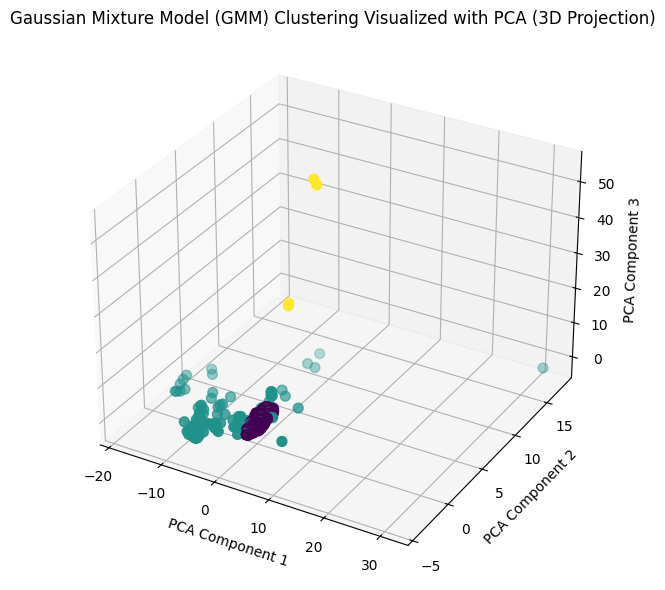

In [45]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# اجرای خوشه‌بندی با مدل مخلوط گاوسی روی داده‌های استانداردشده
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)  # تعداد خوشه‌ها قابل تنظیم است
gmm_labels = gmm.fit_predict(scaled_df_clean)

# کاهش ابعاد داده‌ها به سه مؤلفه اصلی با PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_df_clean)

# رسم داده‌ها با رنگ‌بندی بر اساس برچسب‌های GMM در فضای سه‌بعدی
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    pca_result[:, 2],
    c=gmm_labels,
    cmap='viridis',
    s=50
)

ax.set_title('Gaussian Mixture Model (GMM) Clustering Visualized with PCA (3D Projection)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.tight_layout()
plt.show()



In [46]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

# محدوده‌ای از تعداد خوشه‌ها برای آزمون
cluster_range = range(2, 10)

# ذخیره امتیازها برای مقایسه
gmm_scores = []
agglo_scores = []

for k in cluster_range:
    # Gaussian Mixture
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels = gmm.fit_predict(scaled_df_clean)
    gmm_score = silhouette_score(scaled_df_clean, gmm_labels)
    gmm_scores.append(gmm_score)

    # Agglomerative Clustering
    agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')
    agglo_labels = agglo.fit_predict(scaled_df_clean)
    agglo_score = silhouette_score(scaled_df_clean, agglo_labels)
    agglo_scores.append(agglo_score)

# نمایش بهترین تعداد خوشه‌ها
best_k_gmm = cluster_range[np.argmax(gmm_scores)]
best_k_agglo = cluster_range[np.argmax(agglo_scores)]

print(f"Best GMM n_components: {best_k_gmm} with silhouette score: {max(gmm_scores):.4f}")
print(f"Best Agglomerative n_clusters: {best_k_agglo} with silhouette score: {max(agglo_scores):.4f}")



Best GMM n_components: 2 with silhouette score: 0.7399
Best Agglomerative n_clusters: 3 with silhouette score: 0.7791


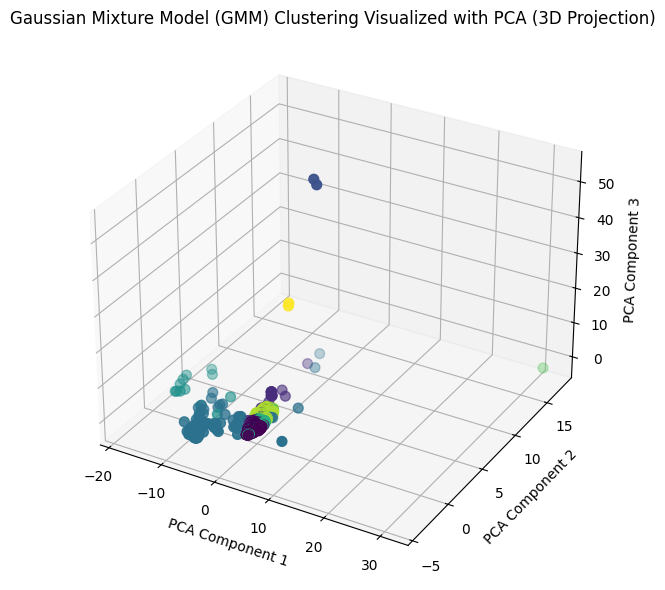

In [47]:
# اجرای Isolation Forest روی داده‌های استانداردشده
iso_forest = IsolationForest(contamination=0.01, random_state=42)
labels = iso_forest.fit_predict(scaled_df_clean)

# کاهش ابعاد داده‌ها به سه مؤلفه اصلی با PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_df_clean)

# رسم داده‌ها با رنگ‌بندی بر اساس برچسب‌های GMM در فضای سه‌بعدی
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    pca_result[:, 0],
    pca_result[:, 1],
    pca_result[:, 2],
    c=gmm_labels,
    cmap='viridis',
    s=50
)

ax.set_title('Gaussian Mixture Model (GMM) Clustering Visualized with PCA (3D Projection)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.tight_layout()
plt.show()



In [48]:
# Re-run Isolation Forest to add 'anomaly_label' column
iso_forest = IsolationForest(contamination=0.01, random_state=42)
labels = iso_forest.fit_predict(scaled_df_clean)

scaled_df_clean['anomaly_label'] = labels

# شمارش تعداد موارد نرمال و غیرنرمال
counts = scaled_df_clean['anomaly_label'].value_counts()

# نمایش نتایج
print("تعداد موارد نرمال (label = 1):", counts.get(1, 0))
print("تعداد موارد غیرنرمال (label = -1):", counts.get(-1, 0))

تعداد موارد نرمال (label = 1): 7134
تعداد موارد غیرنرمال (label = -1): 73


In [49]:
# فرض بر این است که original_df شامل داده‌های اصلی قبل از نرمال‌سازی است
# و ایندکس آن با scaled_df_clean هم‌راستا است

# اضافه کردن برچسب ناهنجاری به دیتافریم اصلی
df1['anomaly_label'] = scaled_df_clean['anomaly_label']

# انتخاب ۱۰ نمونه تصادفی از داده‌ها
sample_df = df1[['AssetID_8341', 'AssetID_8342', 'AssetID_8343', 'AssetID_8344',
       'AssetID_8346', 'AssetID_9286', 'AssetID_9287','anomaly_label']].sample(n=10, random_state=42)

# نمایش نتایج
print("نمونه‌ای از داده‌های اصلی همراه با وضعیت ناهنجاری:")
print(sample_df)


نمونه‌ای از داده‌های اصلی همراه با وضعیت ناهنجاری:
      AssetID_8341  AssetID_8342  AssetID_8343  AssetID_8344  AssetID_8346  \
3813          0.14          11.8          65.0        -240.0           7.9   
828           0.30          12.2          61.0        -200.0           7.7   
2112          0.20          12.4          65.0        -250.0           7.6   
6833          0.06          12.0          69.0        -230.0           6.9   
2022          0.23          12.4          59.0        -240.0           7.7   
4374          0.16          12.0          65.5        -240.0           8.0   
5267          0.16          12.3          69.0        -250.0           6.8   
2758          0.08          12.1          65.0        -240.0           7.6   
468            NaN          12.2           NaN        -200.0           NaN   
5865          0.26          11.9          68.0        -220.0           6.8   

      AssetID_9286  AssetID_9287  anomaly_label  
3813           8.0          1.36        

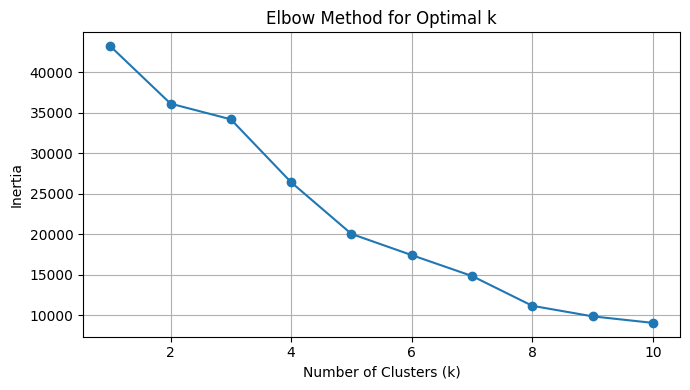

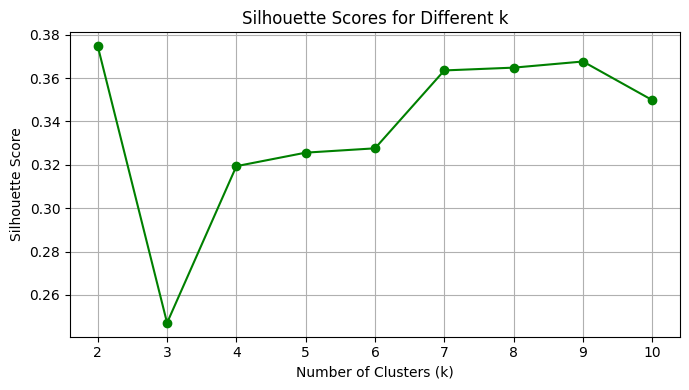

In [50]:
X = scaled_df_clean[['AssetID_8341', 'AssetID_8342', 'AssetID_8343', 'AssetID_8344',
       'AssetID_8346', 'AssetID_9286', 'AssetID_9287']]

# Elbow Method
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

# Silhouette Scores
silhouette_scores = []
k_range_sil = range(2, 11)
for k in k_range_sil:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(7, 4))
plt.plot(k_range_sil, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()


In [51]:
# اجرای Isolation Forest روی داده‌های استانداردشده
iso_forest = IsolationForest(contamination=0.010, random_state=42)
labels = iso_forest.fit_predict(scaled_df_clean[['AssetID_8341', 'AssetID_8342', 'AssetID_8343', 'AssetID_8344',
       'AssetID_8346', 'AssetID_9286', 'AssetID_9287']])

# اضافه کردن برچسب ناهنجاری به دیتافریم استانداردشده
scaled_df_clean['anomaly_label'] = labels
scaled_df_clean['anomaly_status'] = scaled_df_clean['anomaly_label'].map({1: 'normal', -1: 'abnormal'})

# انتقال برچسب‌ها به دیتافریم اصلی (مقادیر واقعی)
df1['anomaly_status'] = scaled_df_clean['anomaly_status']

# محاسبه تعداد موارد نرمال و غیرنرمال
status_counts = df1['anomaly_status'].value_counts()
print("تعداد موارد نرمال:", status_counts.get('normal', 0))
print("تعداد موارد غیرنرمال:", status_counts.get('abnormal', 0))

# انتخاب حداقل ۲ مورد abnormal و ۸ مورد normal
abnormal_samples = df1[df1['anomaly_status'] == 'abnormal'][['AssetID_8341', 'AssetID_8342', 'AssetID_8343', 'AssetID_8344',
       'AssetID_8346', 'AssetID_9286', 'AssetID_9287', 'anomaly_status']].sample(n=2, random_state=42)
normal_samples = df1[df1['anomaly_status'] == 'normal'][['AssetID_8341', 'AssetID_8342', 'AssetID_8343', 'AssetID_8344',
       'AssetID_8346', 'AssetID_9286', 'AssetID_9287', 'anomaly_status']].sample(n=8, random_state=24)

# ترکیب و نمایش ۱۰ نمونه
final_samples = pd.concat([abnormal_samples, normal_samples]).reset_index(drop=True)
print("\nنمونه‌ای از داده‌های واقعی همراه با وضعیت ناهنجاری (حداقل دو مورد abnormal):")
print(final_samples)


تعداد موارد نرمال: 7135
تعداد موارد غیرنرمال: 72

نمونه‌ای از داده‌های واقعی همراه با وضعیت ناهنجاری (حداقل دو مورد abnormal):
   AssetID_8341  AssetID_8342  AssetID_8343  AssetID_8344  AssetID_8346  \
0          0.12          11.6          47.0        -260.0           0.0   
1          0.38           0.0          31.0        -180.0           0.0   
2          0.30          12.0          67.0        -205.0           7.8   
3          0.16          12.4          64.0        -200.0           7.7   
4          0.12          11.9          67.0        -195.0           7.7   
5          0.29          12.0          68.0        -220.0           7.0   
6          0.13          11.9          68.0        -240.0           6.9   
7          0.25          12.0          69.0        -205.0           7.7   
8          0.10          11.8          74.5        -220.0           6.8   
9          0.13          11.8          69.0        -240.0           7.8   

   AssetID_9286  AssetID_9287 anomaly_status  
